##  Project Title: Sales Forecasting using ARIMA

**Objective:** To analyze and forecast sales using historical data, enabling better business decisions.

### ARIMA and Seasonal ARIMA
#### Autoregressive Integrated Moving Averages
<p>The general process for AIRMA models is the following</p>


- Visualise the time series data
- Make the time series data stationary
- plot the Correlation and Auto Correlation Charts
- construct the AIRMA Model or Seasonal AIRMA based on the data
- use the model to make predictions


### 1. Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the dataset

In [2]:
df = pd.read_csv("Data/Sales.csv", encoding= 'ISO-8859-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### 3. Basic Data Explanation

In [4]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.info()
df.describe()
df.isnull().sum()

Shape: (9994, 21)

Columns:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 n

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 4. Convert Dates and Check time span

Data from: 2014-01-03 00:00:00 to 2017-12-30 00:00:00


<Axes: title={'center': 'Sales Over Time'}, xlabel='Order Date'>

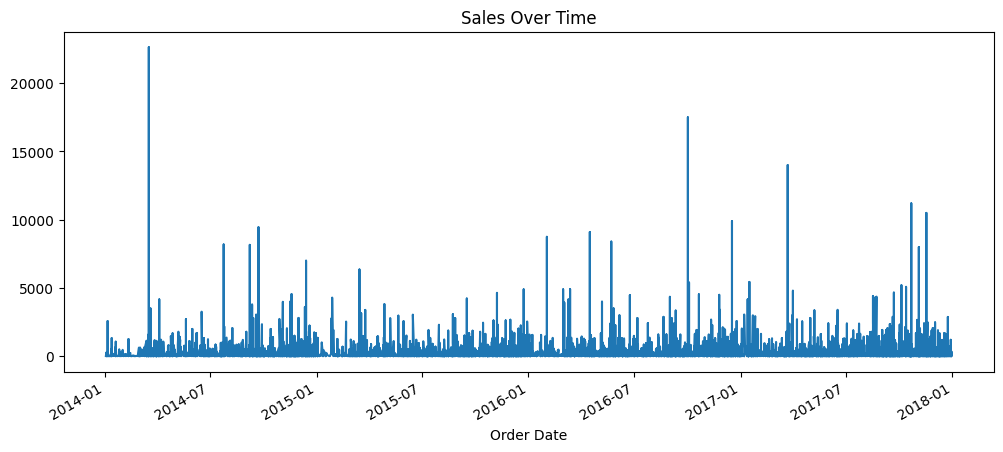

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')
df.set_index('Order Date', inplace=True)

print("Data from:", df.index.min(), "to", df.index.max())
df['Sales'].plot(title='Sales Over Time', figsize=(12, 5))

#### 5. Resample sales monthly

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Order Date'>

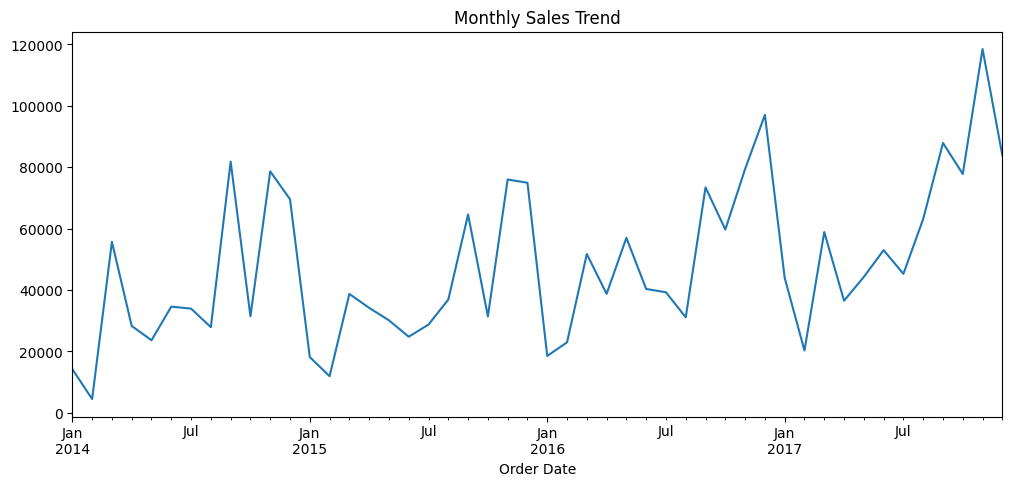

In [6]:
monthly_sales = df['Sales'].resample('M').sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(12, 5))

#### 6. Stationarity check using ADF Test

In [7]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] <= 0.05 else "Not Stationary")

adf_test(monthly_sales)

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758
Stationary


#### 7️. Differencing if Needed

ADF Statistic: -9.057696814193989
p-value: 4.6531639128973e-15
Stationary


<Axes: title={'center': 'First Order Differenced Sales'}, xlabel='Order Date'>

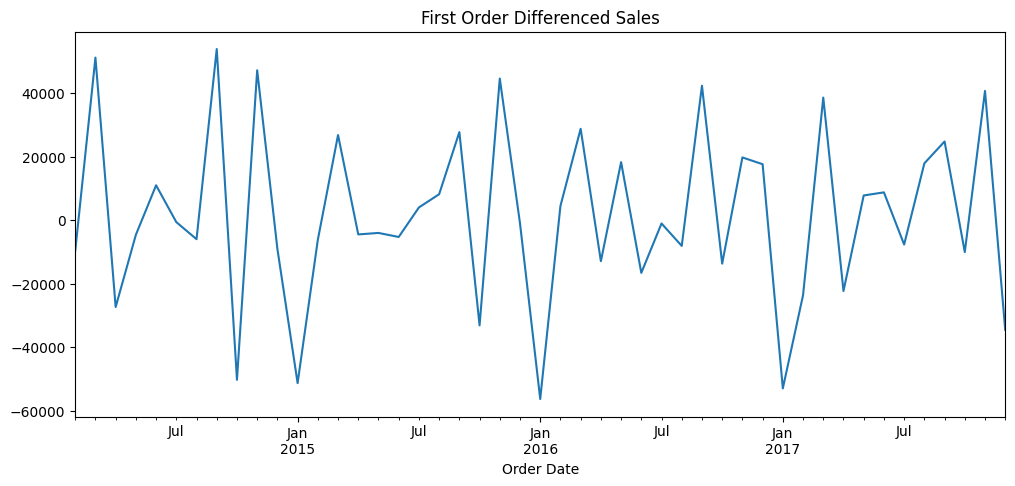

In [8]:
monthly_diff = monthly_sales.diff().dropna()
adf_test(monthly_diff)

monthly_diff.plot(title='First Order Differenced Sales', figsize=(12, 5))

#### 8️. Build & Train ARIMA Model

In [9]:
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.895
Date:                Sat, 19 Jul 2025   AIC                           1085.789
Time:                        15:55:41   BIC                           1091.340
Sample:                    01-31-2014   HQIC                          1087.878
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.262      0.868      0.386      -0.287       0.742
ma.L1         -0.8396      0.140     -5.979      0.000      -1.115      -0.564
sigma2      5.976e+08   6.93e-11   8.63e+18      0.0

#### 9️. Forecast Future Sales

In [10]:
forecast = model_fit.forecast(steps=6)
forecast

2018-01-31    75259.028207
2018-02-28    73306.800146
2018-03-31    72862.101759
2018-04-30    72760.803833
2018-05-31    72737.729159
2018-06-30    72732.472975
Freq: ME, Name: predicted_mean, dtype: float64

#### 10. Visualize Forecast

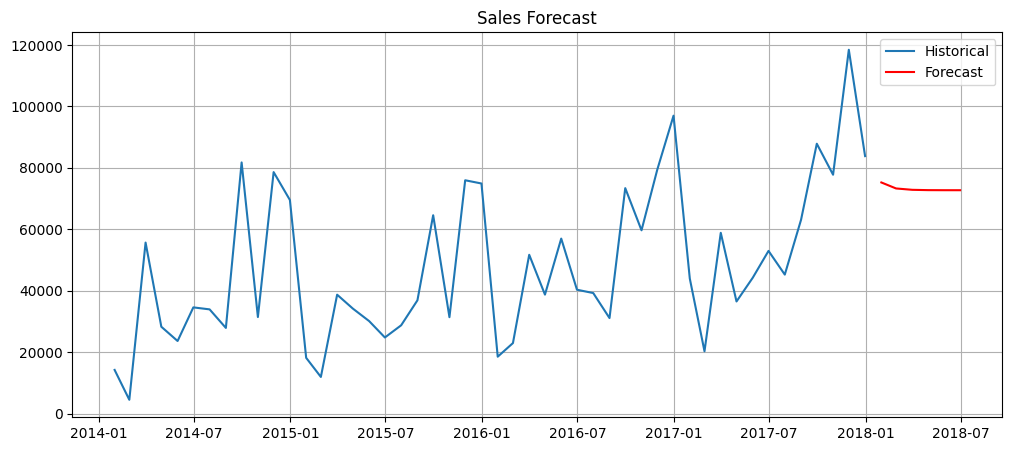

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, label='Historical')
plt.plot(forecast.index, forecast.values, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()

##  Conclusion
- The ARIMA model fits reasonably well.
- Forecasted values provide short-term insights.
